## Josavee Sok-Coyle (jos259@pitt.edu)

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from matplotlib.patches import FancyArrowPatch

In [3]:
data = pd.read_csv(r'C:\Users\Savee\Downloads\billionaire_list_20yrs.csv')

In [4]:
#clean up data by filtering time to 2022 and only unique name values

#main plan is to plot size by annual_income, color what type of company they are in, gender in fill or not fill, and color fill by country

In [5]:
#cleaning up the data by filtering time to 2022, dropping unneeded columns, and dropping duplicates
data = data.query('time == 2022')
data = data.drop(['state', 'last_name', 'countries', 'daily_income', 'birth_year', 'industry', 'headquarters', 'name_cleaned'], axis=1)

In [6]:
data = data.drop_duplicates(subset=["name"],keep="first")
data = data.dropna()

In [7]:
data['country'] = data['permanent_country'].str.split('-').str[0]

In [8]:
def convert_continent(country):
    Asia = ['India', 'Japan', 'Malaysia', 'China', 'Indonesia', 'Thailand',
           'Singapore', 'Philippines', 'South Korea', 'China ', 'Israel',
           'United Arab Emirates', 'Dubai', 'Kazakhstan']
    North_America = ['United States', 'USA', 'USA ' 'Canada', 'Mexico', 'Bahamas']
    Europe = ['United Kingdom', 'France', 
              'Denmark', 'Russia', 'Germany', 'Switzerland', 'Spain', 
              'Sweden', 'Findland', 'Italy', 'New Zealand', 'UK', 
              'Czech Republic', 'Georgia', 'Austria', 'Monaco', 'Netherlands',
             'Belgium', 'Poland', 'Portugal', 'Turkey', 'Ukraine']
    Africa = ['Nigeria', 'Algeria', 'South Africa', 'Egypt']
    Australia = ['Australia']
    South_America = ['Brazil', 'Peru', 'Chile', 'Colombia']
    for asia in Asia:
        if asia in country:
            return 'Asia'
    for north in North_America:
        if north in country:
            return 'North America'
    for eur in Europe:
        if eur in country:
            return 'Europe'
    for af in Africa:
        if af in country:
            return 'Africa'
    for aust in Australia:
        if aust in country:
            return 'Australia'
    for south in South_America:
        if south in country:
            return 'South America'

In [9]:
data['continent'] = data['country'].apply(lambda x: convert_continent(x))
data = data.dropna()

In [10]:
data
#18 unique industries and 6 unique areas

,Unnamed: 0,name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,annual_income,country,continent
90,765,Abdulla bin Ahmad Al Ghurair,67,M,2022,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,67080000,United Arab Emirates,Asia
1309,118457,Hank & Doug Meijer,69,M,2022,United States-Michigan-Grand Rapids,Meijer Supermarket,Fashion & Retail,supermarkets,425700000,United States,North America
1669,132791,Ian & Richard Livingstone,72,M,2022,United Kingdom-London,London & Regional Properties;London and Region...,Real Estate,real estate,229620000,United Kingdom,Europe
3166,214049,Martin & Olivier Bouygues,69,M,2022,France-Paris,Bouygues,Construction & Engineering,"construction, media",108360000,France,Europe
5458,970,Abdulsamad Rabiu,61,M,2022,Nigeria-Lagos,BUA;Bua,Diversified,"cement, sugar; sugar, flour, cement",178020000,Nigeria,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
351966,357914,Zong Qinghou,76,M,2022,China-Zhejiang-Hangzhou,Wahaha,Food & Beverage,beverages; Beverages,227040000,China,Asia
351982,357930,Zong Yanmin,58,M,2022,China-Jinan,Sicc,Manufacturing,Semiconductor materials,33540000,China,Asia
351984,357933,Zugen Ni,65,M,2022,China-Jiangsu-Suzhou,KingClean Electric,Manufacturing,appliances,46440000,China,Asia
352043,357992,Zuowen Song,75,M,2022,China-Shandong-Yantai,Nanshan,Diversified,"aluminum, diversified",92880000,China,Asia


In [11]:
#find the sum of all main industries and how many people are in each industry
#print(data.groupby(by=['main_industry'])['annual_income'].sum())
#(data['main_industry'].values == 'Telecom').sum()

In [12]:
data2 = {'Industry' : ['Automotive', 'Construction & Engineering', 'Diversified', 'Energy', 'Fashion & Retail',
                   'Finance & Investments', 'Food & Beverage', 'Gambling & Casinos',
                   'Healthcare', 'Logistics', 'Manufacturing', 'Media & Entertainment',
                   'Metals & Mining', 'Real Estate', 'Service', 'Sports', 'Technology', 'Telecom'],
     'Annual Income' : [14053260000, 2399400000, 21540420000, 8792640000, 38070480000,
                       38210832000, 19408050000, 2494860000, 15864420000,
                       4184760000, 23305140000, 10642500000, 8681700000,
                       13764300000, 4450500000, 2218800000, 51027239999, 4716240000],
     'People in Industry' : [55, 36, 138, 71, 207, 291, 161, 18, 107,
                            27, 257, 82, 57, 144, 47, 22, 207, 27]}
df=pd.DataFrame(data2)
df['Average in Industry'] = (df['Annual Income']/df['People in Industry']).astype(int)
df

,Industry,Annual Income,People in Industry,Average in Industry
0,Automotive,14053260000,55,255513818
1,Construction & Engineering,2399400000,36,66650000
2,Diversified,21540420000,138,156090000
3,Energy,8792640000,71,123840000
4,Fashion & Retail,38070480000,207,183915362
5,Finance & Investments,38210832000,291,131308701
6,Food & Beverage,19408050000,161,120546894
7,Gambling & Casinos,2494860000,18,138603333
8,Healthcare,15864420000,107,148265607
9,Logistics,4184760000,27,154991111


In [13]:
#find the sum of all countries and how many people are in each country
#print(data.groupby(by=['continent'])['annual_income'].sum())
#(data['continent'].values == 'South America').sum()

#notes, there are 45 seperate counties, which can be put into a graph however hard to understand so continents is best

In [14]:
data_c = {'Continent' : ['Africa', 'Asia', 'Australia', 'Europe', 
                         'North America', 'South America'],
     'Annual Income' : [1922100000, 90928230000, 5005200000, 
                        64693500000, 116357999999, 4918512000],
     'People' : [14, 852, 39, 502, 616, 57]}
df_c=pd.DataFrame(data_c)
df_c['Average per Continent'] = (df_c['Annual Income']/df_c['People']).astype(int)
df_c

,Continent,Annual Income,People,Average per Continent
0,Africa,1922100000,14,137292857
1,Asia,90928230000,852,106723274
2,Australia,5005200000,39,128338461
3,Europe,64693500000,502,128871513
4,North America,116357999999,616,188892857
5,South America,4918512000,57,86289684


In [15]:
#find the sum of all ages and how many people are in each age group
#print(data.loc[data['age'] >= 90, 'annual_income'].sum())
#(data['age'].values >= 90).sum()

In [16]:
data_a = {'Age' : ['20-29', '30-39', '40-49', '50-59', '60-69',
                   '70-79', '80-89', '90-100'],
          'Annual Income' : [172860000, 8434019999, 22660140000, 
                             71356350000, 66177000000, 63302880000,
                             40514772000, 11207520000],
          'People' : [5, 47, 183, 536, 547, 469, 238, 55]}
df_a=pd.DataFrame(data_a)
df_a['Average per Age Group'] = (df_a['Annual Income']/df_a['People']).astype(int)
df_a

,Age,Annual Income,People,Average per Age Group
0,20-29,172860000,5,34572000
1,30-39,8434019999,47,179447234
2,40-49,22660140000,183,123825901
3,50-59,71356350000,536,133127518
4,60-69,66177000000,547,120981718
5,70-79,63302880000,469,134974157
6,80-89,40514772000,238,170230134
7,90-100,11207520000,55,203773090


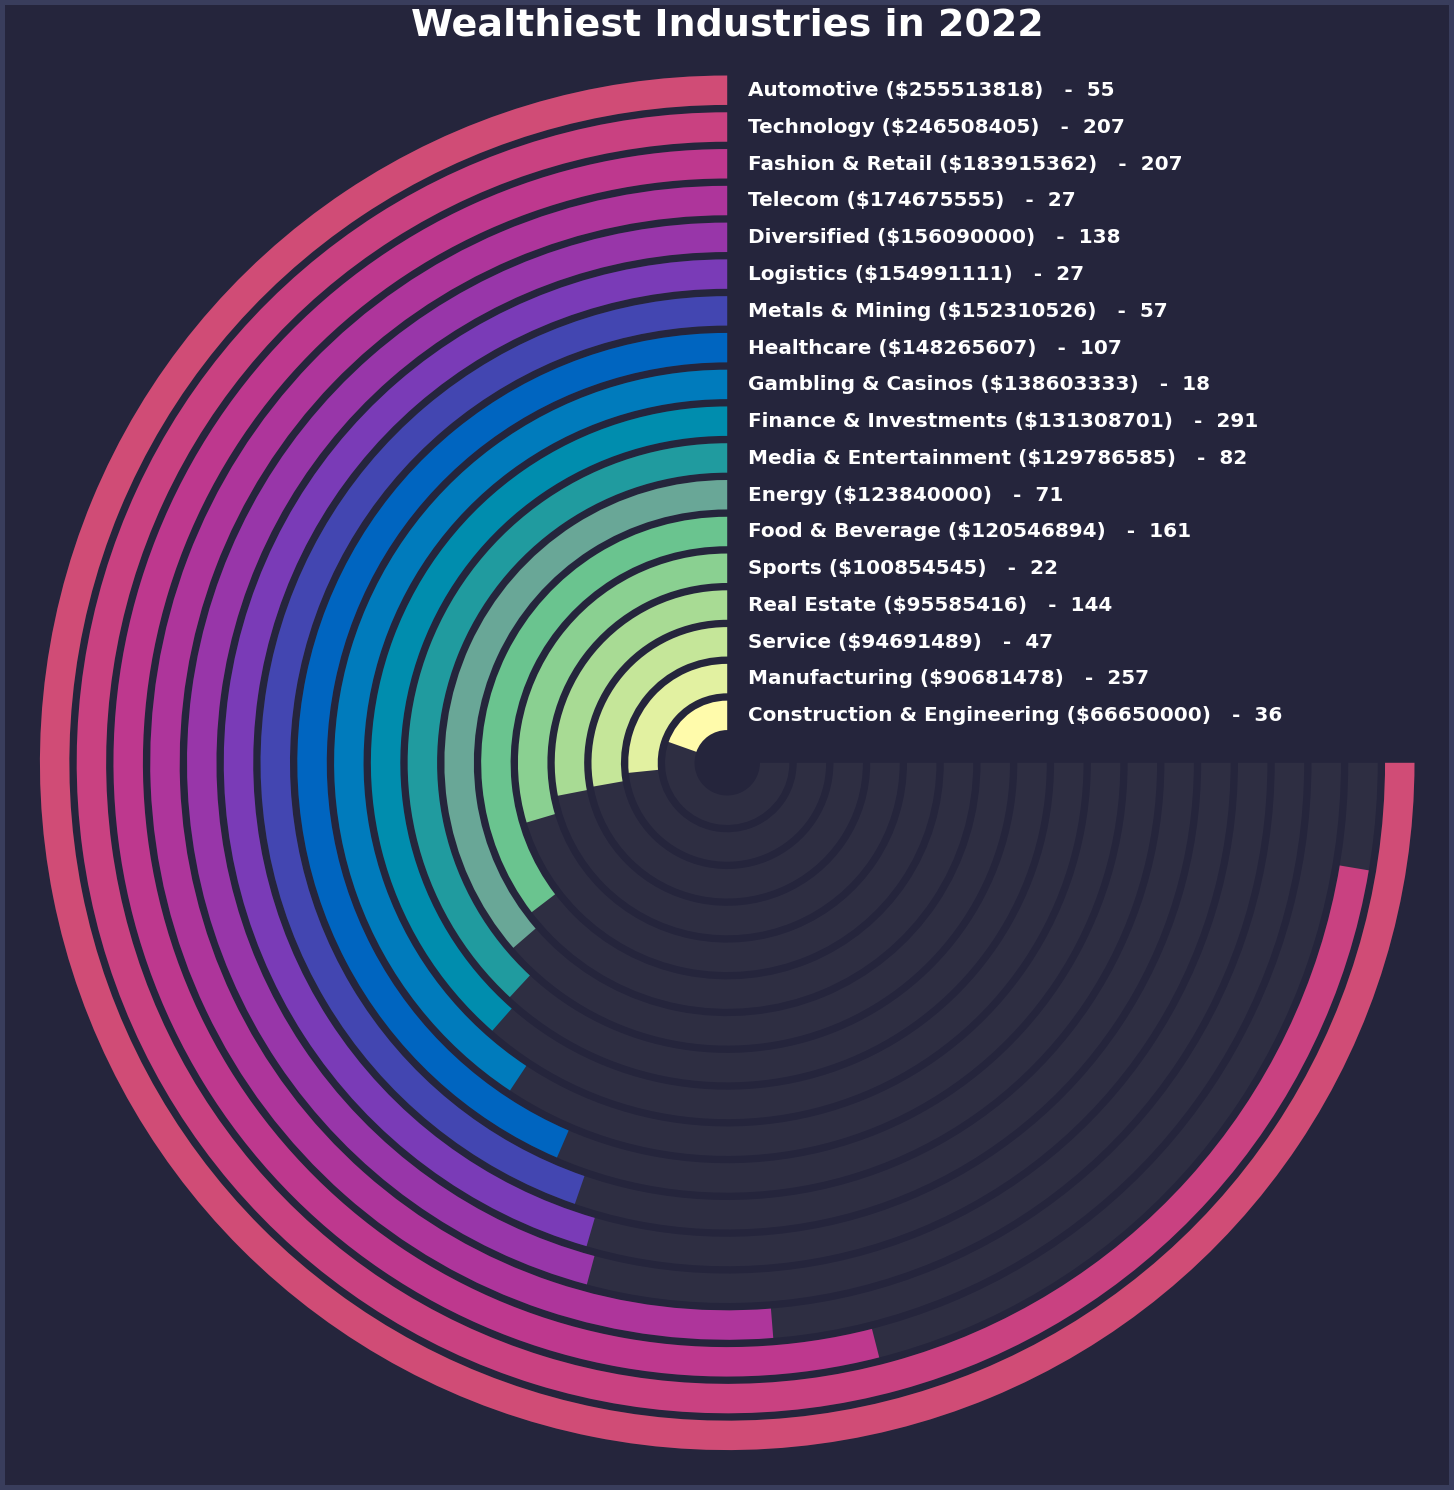

In [17]:
df_sorted = df.sort_values('Average in Industry')

max_value_full_ring = max(df_sorted['Average in Industry'])

ring_colours = ['#fffbab', '#e2f1a1', '#c5e699', '#a8db94', '#8ad091',
                '#6ac48f', '#69a797', '#209b9f', '#008dae', '#007bbc',
                '#0065c0', '#4346b1', '#7a3bb7', '#9836a9', '#ae359b',
                '#be388e', '#c94181', '#d04c76']
# Add Legend

ring_labels = [f'   {x} (${v})   -  {p}' for x, v, p in zip(list(df_sorted['Industry']), 
                                                 list(df_sorted['Average in Industry']),
                                                 list(df_sorted['People in Industry']))]
data_len = len(df_sorted)

# Begin creating the figure
fig = plt.figure(figsize=(25,50), linewidth=10,
                 edgecolor='#393d5c', 
                 facecolor='#25253c')

rect = [0.1,0.1,0.8,0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey
# ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring*1.5*np.pi/max_value_full_ring, 
                     color='grey', 
                     alpha=0.1)
# Hide all axis items
ax_polar_bg.axis('off')
    
# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                    16, 17], 
                    labels=ring_labels, 
                    angle=0, 
                    fontsize=20, fontweight='bold',
                    color='white', verticalalignment='center')

# Loop through each entry in the dataframe and create a coloured 
# ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(df_sorted['Average in Industry'])[i]*1.5*np.pi/max_value_full_ring, 
                  color=ring_colours[i])


# Hide all grid elements for the    
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False, 
                   labelbottom=False, labelleft=True)

ax_polar.set_title('Wealthiest Industries in 2022', fontsize=38, fontweight='bold', color='white')
#Average Yearly Income of Billionaires by Industry


plt.show()

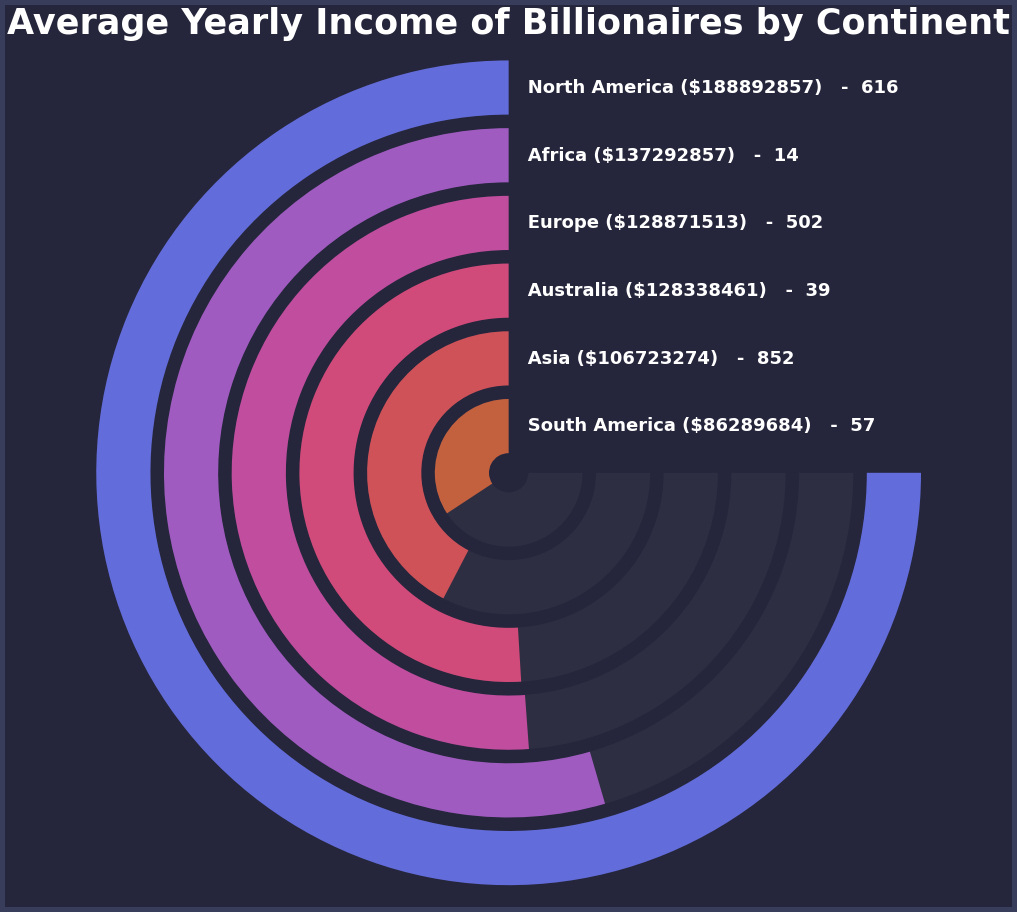

In [18]:
df_sorted_c = df_c.sort_values('Average per Continent')

max_value_full_ring = max(df_sorted_c['Average per Continent'])

ring_colours = ['#c3613f','#cf5259', '#d04a7a', 
                '#c14d9e', '#a05bc0','#626cda']

ring_labels = [f'   {x} (${v})   -  {p}' for x, v, p in zip(list(df_sorted_c['Continent']), 
                                                 list(df_sorted_c['Average per Continent']),
                                                 list(df_sorted_c['People']))]
data_len = len(df_sorted_c)

# Begin creating the figure
fig = plt.figure(figsize=(15,15), linewidth=10,
                 edgecolor='#393d5c', 
                 facecolor='#25253c')

rect = [0.1,0.1,0.8,0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey
# ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring*1.5*np.pi/max_value_full_ring, 
                     color='grey', 
                     alpha=0.1)
# Hide all axis items
ax_polar_bg.axis('off')
    
# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5], 
                    labels=ring_labels, 
                    angle=0, 
                    fontsize=18, fontweight='bold',
                    color='white', verticalalignment='center')

# Loop through each entry in the dataframe and create a coloured 
# ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(df_sorted_c['Average per Continent'])[i]*1.5*np.pi/max_value_full_ring, 
                  color=ring_colours[i])


# Hide all grid elements for the    
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False, 
                   labelbottom=False, labelleft=True)

ax_polar.set_title('Average Yearly Income of Billionaires by Continent', fontsize=35, fontweight='bold', loc='center', color='white')

plt.show()

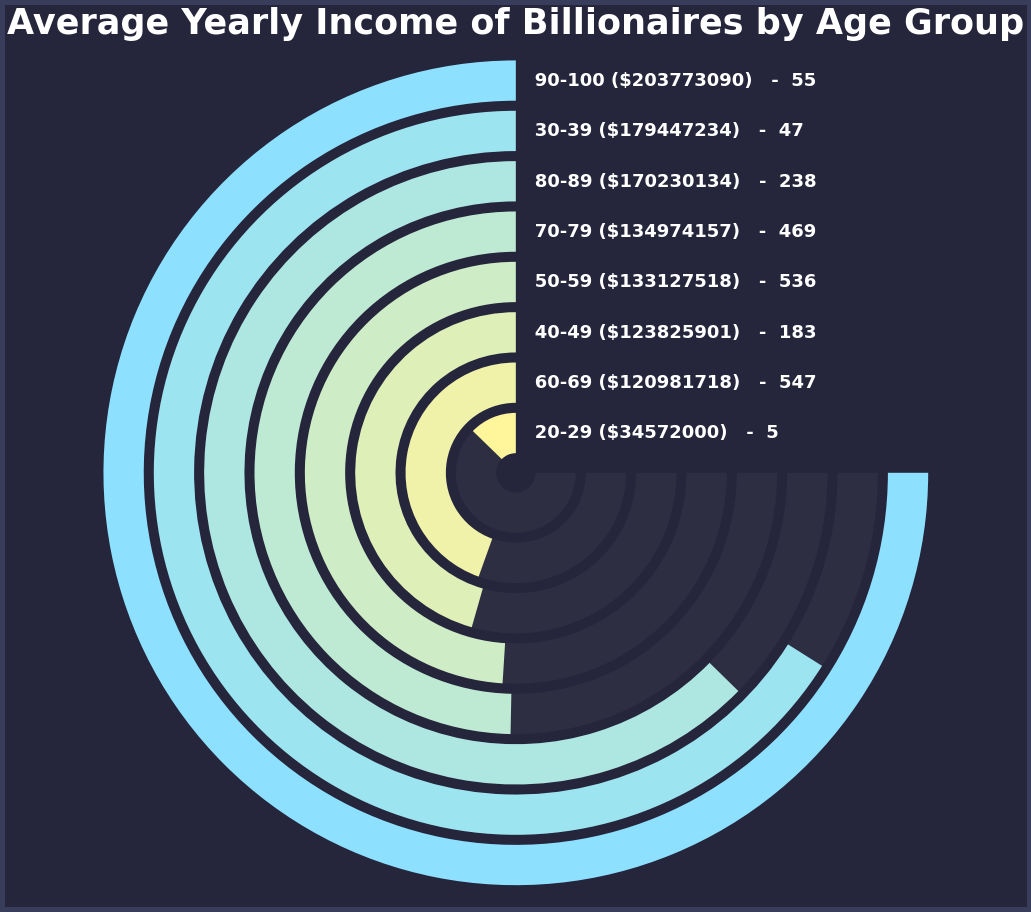

In [19]:
df_sorted_a = df_a.sort_values('Average per Age Group')

max_value_full_ring = max(df_sorted_a['Average per Age Group'])

ring_colours = ['#FFF59A','#EFF2A8', '#DEEFB7', 
                '#CEECC5', '#BEEAD4','#AEE7E2', '#9DE4F1', '#8DE1FF']

ring_labels = [f'   {x} (${v})   -  {p}' for x, v, p in zip(list(df_sorted_a['Age']), 
                                                 list(df_sorted_a['Average per Age Group']),
                                                 list(df_sorted_a['People']))]
data_len = len(df_sorted_a)

# Begin creating the figure
fig = plt.figure(figsize=(15,15), linewidth=10,
                 edgecolor='#393d5c', 
                 facecolor='#25253c')

rect = [0.1,0.1,0.8,0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey
# ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring*1.5*np.pi/max_value_full_ring, 
                     color='grey', 
                     alpha=0.1)
# Hide all axis items
ax_polar_bg.axis('off')
    
# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6, 7], 
                    labels=ring_labels, 
                    angle=0, 
                    fontsize=18, fontweight='bold',
                    color='white', verticalalignment='center')

# Loop through each entry in the dataframe and create a coloured 
# ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(df_sorted_a['Average per Age Group'])[i]*1.5*np.pi/max_value_full_ring, 
                  color=ring_colours[i])


# Hide all grid elements for the    
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False, 
                   labelbottom=False, labelleft=True)

ax_polar.set_title('Average Yearly Income of Billionaires by Age Group', fontsize=35, fontweight='bold', loc='center', color='white')

plt.show()